In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
import math
from scipy.optimize import fsolve
import scipy.linalg as la
import autograd.numpy as np
from autograd import jacobian
from tqdm import tqdm

In [13]:
def getSteadyPoints(params):
    '''This Function takes in the parameters for the Toggle Switch Model and returns a list of steady points.
    
    First the TS equations are defined. Then for a range of initial guesses, the fixed points are computed 
    using fsovle. These are stored in a list that is then converted to set to remove all duplicate values. 
    The set is then converted back to list and returned.                                               '''
    
    # Unpacking the params list.
    alpha1 = params[0]
    alpha2 = params[1]
    beta = params[2]
    gamma = params[3]
    
    # Defining the TS equations for use with fsolve
    def equations(p):
        U ,V = p
        return (((alpha1/(1+V**beta))-U), ((alpha2/(1+U**gamma))-V))

    # Using fsolve with a range of initial conditions to get steady points.
    sp=[]
    for n in range(0,10):
        for i in range(0,10):
            sol, info, ier, msg = fsolve(equations, [n,i], full_output=True)
            if (ier == 1):
                temp = tuple(np.round(sol,4))
                sp.append(temp)
        

    # Removing all duplicates by creating a set. 
    sp_set = set(sp)
    sp_list = list(sp_set)
    return sp_list

In [14]:
def getEigenvalues(steadypoints,params):
    '''This Function takes the steady points and parameters, and returns an array of eigenvalues correspoinding
    to the eigenvalues at each of the steady points
    
    The Jacobian Matrix is defined. For each steady point the eigenvalues and eigenvectors are computed, 
    and the eigenvalues are appended to a list that is returned. 
                                                                                                        '''
    alpha1 = params[0]
    alpha2 = params[1]
    beta = params[2]
    gamma = params[3]
    no_steadyp = len(steadypoints)
    
    
    # Defining Jacobian Matrix
    def Jacobian(U,V,alpha1,alpha2,beta,gamma):
        return ([-1,(-1*alpha1*beta*(V**(beta-1)))/((1+(V**beta))**2)],[(-1*alpha2*gamma*(U**(gamma-1)))/((1+(U**gamma))**2),-1])
    Usp = []
    Vsp = []
    EV_list = []
    for i in range (0,no_steadyp):
        x_s,y_s = steadypoints[i]
        Usp.append(x_s)
        Vsp.append(y_s)
        J1 = np.array(Jacobian(Usp[i],Vsp[i],alpha1,alpha2,beta,gamma))
        eigVals,eigvecs = la.eig(J1)
        EV_list.append(eigVals)

    return EV_list
    

In [15]:
def isToggle(params):
    '''This Function takes in the Toggle Switch Parameters and returns 1 if those set of paremeters give a Toggle
    switch and returns 0 if the parameters dont give a Toggle Switch.
    
    '''
    soln = getSteadyPoints(params)
    eigvals = getEigenvalues(soln,params)
    sp = 0

    
    for i in range(0,len(soln)):
        if (eigvals[i][0]<0 and eigvals[i][1]<0):
                sp = sp + 1
    
    ans = 0
    if (sp == 2): ans = 1
    
    return ans

In [16]:
# Testing The Functions

alpha1 = 10
alpha2 = 10
beta = 2
gamma = 2
params = [alpha1,alpha2,beta,gamma]

steady_points = getSteadyPoints(params)
a = isToggle(params)
print(a)


    

1


100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [15:10<00:00,  3.73s/it]


Text(0, 0.5, 'alpha1')

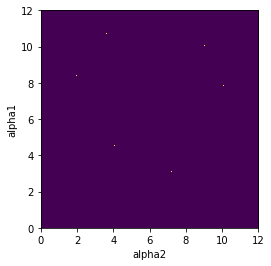

In [17]:
# Bifurcation Diagram:
size = 12
step = 0.05
values = np.arange(0,size,step)
l = (len(values))
B_List = np.zeros((l,l))

for a1 in tqdm(values):
    for a2 in values:
        ia1 = np.where(values==a1)
        ia2 = np.where(values==a2)
        a1index = int(ia1[0])
        a2index = int(ia2[0])
        
        B_List[a1index][a2index] = isToggle([a1,a2,1,1.5])
plt.imshow(B_List,origin='lower',extent=[0.0,12,0.0,12])
plt.xlabel('alpha2')
plt.ylabel('alpha1')

In [ ]:
#beta =1 and gamma =1.5 -> no region of toggle switch